# Import

In [6]:
import numpy as np
import sys
sys.path.append('../')
sys.path.append('src')
from preprocessing import Preprocessing
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

# Data

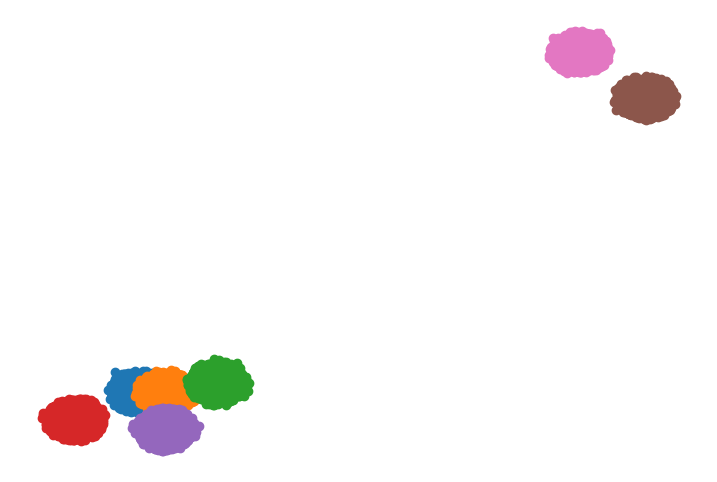

In [7]:
N = 1_000_000
CENTERS = np.zeros((7, 2))
CENTERS[:5, :2] = np.random.randint(-10, 10, (5, 2))
CENTERS[5, :2] = [35, 30]
CENTERS[6, :2] = [30, 35]
DATA = np.concatenate([np.random.multivariate_normal(center, np.eye(2), size=N) + center for center in CENTERS], axis=0)
THRESHOLD = 0.1

plt.figure(figsize=(9, 6))
for idx_center, center in enumerate(CENTERS):
    plt.scatter(DATA[idx_center * N:(idx_center + 1) * N, 0], DATA[idx_center * N:(idx_center + 1) * N, 1], label=f'Center {idx_center}')
# plt.legend()
plt.axis('off')
plt.savefig(f"../../fig/model/raw_data.png", bbox_inches='tight')

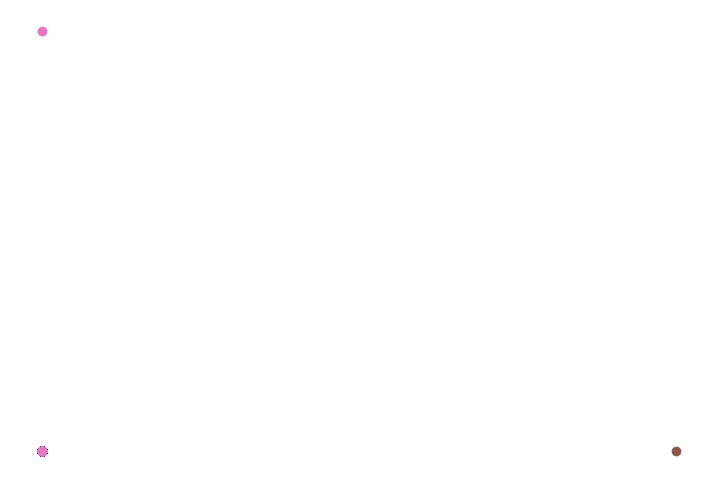

In [8]:
extreme_data = Preprocessing.transform_to_extreme_values(DATA)

plt.figure(figsize=(9, 6))
for idx_center, center in enumerate(CENTERS):
    plt.scatter(extreme_data[idx_center * N:(idx_center + 1) * N, 0], extreme_data[idx_center * N:(idx_center + 1) * N, 1], label=f'Center {idx_center}')
# plt.legend()
plt.axis('off')
plt.savefig(f"../../fig/model/extreme_data.png", bbox_inches='tight')

In [ ]:
largest_data, cut_off, _ = Preprocessing.filter_largest(extreme_data, THRESHOLD)
print(cut_off)

plt.figure(figsize=(9, 6))
for idx_center, center in enumerate(CENTERS):
    largest_data_k = extreme_data[idx_center * N:(idx_center + 1) * N]
    largest_data_k = largest_data_k[np.linalg.norm(largest_data_k, axis=1) > cut_off]
    print(largest_data_k.shape)
    plt.scatter(largest_data_k[:, 0], largest_data_k[:, 1], label=f'Center {idx_center}')
plt.axis('off')
plt.savefig(f"../../fig/model/largest_data.png", bbox_inches='tight')

ValueError: too many values to unpack (expected 2)

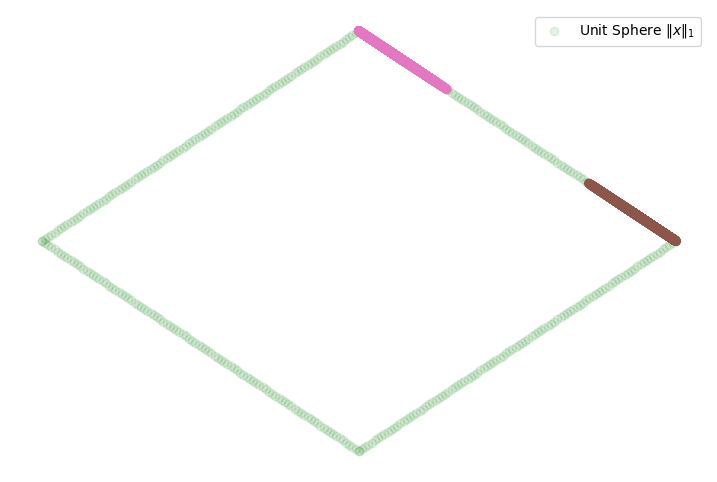

In [302]:
sphere_data = Preprocessing.project_onto_unit_sphere(largest_data)

plt.figure(figsize=(9, 6))
plt.scatter(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), color="green", alpha=0.1)
plt.scatter(np.linspace(0, 1, 100), -(1 - np.linspace(0, 1, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), 1 - abs(np.linspace(-1, 0, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), -(1 - abs(np.linspace(-1, 0, 100))), color="green", alpha=0.1, label = rf"Unit Sphere $ \| x \|_1$")
plt.scatter(sphere_data[:, 0], sphere_data[:, 1], c=np.where(sphere_data[:, 1] < 0.5, "#8c564b", "#e377c2"))
plt.legend(loc='best')
plt.axis('off')
plt.savefig(f"../../fig/model/unit_sphere_data.png", bbox_inches='tight')

In [303]:
sphere_data.shape

(7000, 2)

# Clustering

In [304]:
from spherical_k_means import ExtremeSphericalKMeans

kmeans = ExtremeSphericalKMeans(n_clusters=2, max_iter=1, threshold=THRESHOLD)
kmeans.fit(DATA)

[1 1 1 ... 0 0 0]


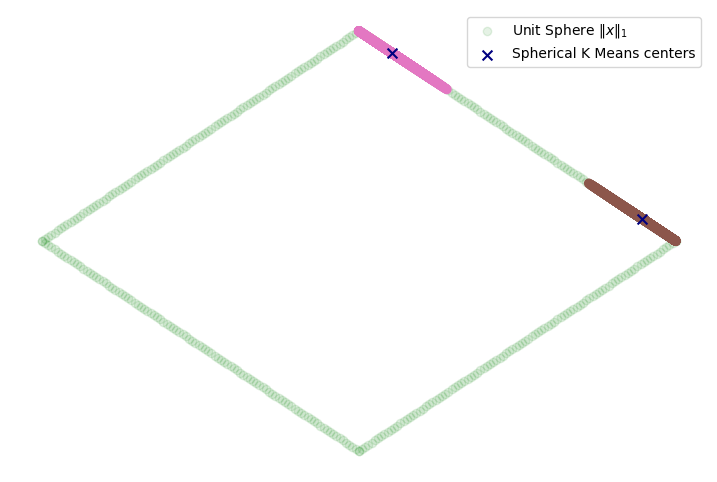

In [311]:
plt.figure(figsize=(9, 6))

plt.scatter(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), color="green", alpha=0.1)
plt.scatter(np.linspace(0, 1, 100), -(1 - np.linspace(0, 1, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), 1 - abs(np.linspace(-1, 0, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), -(1 - abs(np.linspace(-1, 0, 100))), color="green", alpha=0.1, label = rf"Unit Sphere $ \| x \|_1$")

plt.scatter(sphere_data[:, 0], sphere_data[:, 1], c=np.where(sphere_data[:, 1] < 0.5, "#8c564b", "#e377c2"))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=50, c="navy", label="Spherical K Means centers")
    
plt.legend(loc='best')
plt.axis('off')

plt.savefig(f"../../fig/model/kmeans.png", bbox_inches='tight')


In [306]:
kmeans.cluster_centers_

array([[0.10606382, 0.89393618],
       [0.89403735, 0.10596265]])